<a href="https://colab.research.google.com/github/ManelSoengas/tutorials/blob/main/Us_models_preentrenats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Example 4.7
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [5]:
# Create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1),
activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
#=====
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#=====
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [6]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,514 (877.01 KB)

 Trainable params: 224,514 (877.01 KB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
#Example 4.9
# Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


import matplotlib.pyplot as plt
import numpy as np

In [9]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


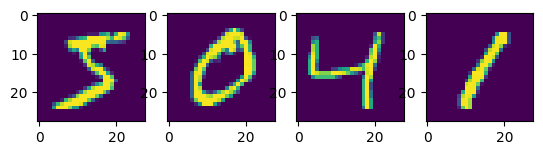

In [11]:
# plot 4 images as gray scale
plt.subplot(141)
plt.imshow(X_train[0])
plt.subplot(142)
plt.imshow(X_train[1])
plt.subplot(143)
plt.imshow(X_train[2])
plt.subplot(144)
plt.imshow(X_train[3])
plt.show()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [13]:
# normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# nombre de classes
num_classes = y_test.shape[1]

In [26]:
# Create model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1),
activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [27]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])

In [28]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
epochs=10, batch_size=200)
# Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3646 - loss: 1.8045 - val_accuracy: 0.8824 - val_loss: 0.3973
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8752 - loss: 0.4048 - val_accuracy: 0.9302 - val_loss: 0.2348
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9201 - loss: 0.2638 - val_accuracy: 0.9536 - val_loss: 0.1588
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9416 - loss: 0.1948 - val_accuracy: 0.9626 - val_loss: 0.1247
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9526 - loss: 0.1568 - val_accuracy: 0.9668 - val_loss: 0.1060
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9565 - loss: 0.1394 - val_accuracy: 0.9736 - val_loss: 0.0899
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9614 - loss: 0.1248 - val_accuracy: 0.9715 - val_loss: 0.0862
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9640 - loss: 0.1127 - val_accuracy:

In [29]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,456,544 (5.56 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 971,030 (3.70 MB)

In [34]:
#Example 4.12
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import numpy as np
from tensorflow.keras.applications import (
    vgg16,
    resnet50,
    mobilenet,
    inception_v3
)

# init the models
#model = vgg16.VGG16(weights='imagenet')
model = resnet50.ResNet50(weights='imagenet')
#model = mobilenet.MobileNet(weights='imagenet')
#model = inception_v3.InceptionV3(weights='imagenet')
print(model.summary())
img_path = '/content/256px-African_Bush_Elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#processed_image = vgg16.preprocess_input(x)
#processed_image = resnet50.preprocess_input(x)
processed_image = mobilenet.preprocess_input(x)
#processed_image = inception_v3.preprocess_input(x)
# prediction
predictions = model.predict(x)
results = decode_predictions(predictions)
print(results)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_10[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[[('n01930112', 'nematode', np.float32(0.14828593)), ('n03729826', 'matchstick', np.float32(0.03809598)), ('n03804744', 'nail', np.float32(0.022386193)), ('n02783161', 'ballpoint', np.float32(0.022194037)), ('n03041632', 'cleaver', np.float32(0.020066127))]]


574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


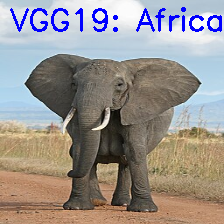

In [37]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications import vgg19
import numpy as np
from google.colab.patches import cv2_imshow   # <-- en lloc de cv2.imshow

image_size = 224
model = vgg19.VGG19(weights='imagenet')

# ⚠️ Colab no té accés a la webcam local, però pots pujar un vídeo o imatge.
# Aquí et mostro amb una imatge pujada (canvia 'Elephant.jpg' per la teva).
frame = cv2.imread("/content/256px-African_Bush_Elephant.jpg")  # substitueix per fitxer pujat
frame = cv2.resize(frame, (image_size, image_size))

numpy_image = img_to_array(frame)
image_batch = np.expand_dims(numpy_image, axis=0)
processed_image = vgg16.preprocess_input(image_batch.copy())

# predicció
predictions = model.predict(processed_image)
label = decode_predictions(predictions)

# escriure el resultat a la imatge
cv2.putText(frame, "VGG19: {}, {:.1f}".format(label[0][0][1],
                                              label[0][0][2]*100),
            (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# mostrar en Colab
cv2_imshow(frame)
